In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', 500)
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
from sklearn.model_selection import train_test_split

/home/matthew/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_stata('JSTdatasetR3.dta')
# https://www.rug.nl/ggdc/productivity/pwt/
df1 = pd.read_stata('pwt90.dta')

In [3]:
df.shape

(2499, 29)

In [4]:
df.head()

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,cpi,ca,imports,exports,narrowm,money,stir,ltrate,stocks,debtgdp,revenue,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,2.708333,-6.147594,36.0,37.0,23.3,54.3,4.88,4.911817,0.304609,0.172568,NaN,NaN,0.366946,0,54.792,1.680,1.680,53.112,0.492253
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,2.666667,5.260774,34.0,46.0,27.2,59.5,4.60,4.844633,0.280119,0.191799,NaN,NaN,0.369146,0,53.748,1.766,1.766,51.982,0.469877
2,1872,Australia,AUS,193,1722.0,3553.426249,15.044247,21.085006,227.40,0.130438,2.541667,7.867636,38.0,53.0,36.2,68.5,4.60,4.737350,0.323705,0.154920,NaN,NaN,0.369239,0,55.822,1.470,1.470,54.352,0.484794
3,1873,Australia,AUS,193,1769.0,3823.629169,16.219443,23.254910,266.54,0.124986,2.541667,-11.047833,49.0,50.0,38.6,73.7,4.40,4.671958,0.374300,0.142692,NaN,NaN,0.362405,0,65.380,1.364,1.364,64.016,0.469877
4,1874,Australia,AUS,193,1822.0,3834.796926,16.268228,23.458050,287.58,0.141960,2.666667,-5.563959,49.0,54.0,37.9,79.3,4.50,4.653317,0.394924,0.194322,NaN,NaN,0.372223,0,71.478,1.434,1.434,70.044,0.566836


In [5]:
df['country'].unique()

array(['Australia', 'Belgium', 'Canada', 'Switzerland', 'Germany',
       'Denmark', 'Spain', 'Finland', 'France', 'UK', 'Italy', 'Japan',
       'Netherlands', 'Norway', 'Portugal', 'Sweden', 'USA'], dtype=object)

In [6]:
df.corr()

,year,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,cpi,ca,imports,exports,narrowm,money,stir,ltrate,stocks,debtgdp,revenue,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom
year,1.000000e+00,3.432975e-18,0.248862,0.872663,0.900119,0.888286,0.208654,0.640633,0.815864,-0.117031,0.225686,0.226040,0.168218,0.199018,0.095029,0.215471,0.623684,0.110620,0.229729,0.226487,0.219815,-0.053040,0.180189,0.166933,0.173929,0.164413,0.711389
ifs,3.432975e-18,1.000000e+00,-0.367915,-0.127047,-0.042816,-0.038091,0.188920,0.095134,-0.022612,-0.157341,0.167758,0.157707,0.156730,0.178814,0.128862,0.164121,-0.003378,-0.138978,0.198320,0.200023,-0.020045,-0.015830,0.172023,0.170334,0.203118,0.212935,0.054349
pop,2.488621e-01,-3.679147e-01,1.000000,0.312957,0.230220,0.181656,0.008210,0.057592,0.225789,-0.001068,-0.001996,-0.002198,0.015598,0.007506,-0.024953,-0.008226,0.106295,0.153966,-0.000866,0.001049,0.123296,-0.002594,0.009898,0.008582,-0.013415,-0.013742,0.107910
rgdpmad,8.726632e-01,-1.270473e-01,0.312957,1.000000,0.972367,0.965939,0.157175,0.506130,0.914822,-0.066344,0.179102,0.183381,0.127300,0.148490,-0.005379,0.091992,0.772790,0.113938,0.177396,0.170660,0.127858,-0.030587,0.135722,0.127841,0.097576,0.073746,0.830048
rgdppc,9.001192e-01,-4.281590e-02,0.230220,0.972367,1.000000,0.991693,0.241103,0.530199,0.948228,-0.150874,0.266262,0.265607,0.196271,0.229228,0.025626,0.136391,0.758788,0.135133,0.265709,0.260422,0.186877,-0.028958,0.211009,0.197331,0.200493,0.181348,0.831454
rconpc,8.882855e-01,-3.809098e-02,0.181656,0.965939,0.991693,1.000000,0.233185,0.530054,0.939805,-0.148053,0.257539,0.256609,0.186814,0.221122,0.025254,0.138014,0.753991,0.121012,0.258409,0.252530,0.192940,-0.025908,0.202474,0.188966,0.191050,0.172528,0.827786
gdp,2.086539e-01,1.889197e-01,0.008210,0.157175,0.241103,0.233185,1.000000,0.117497,0.340956,-0.618559,0.983637,0.974874,0.950701,0.994674,-0.032306,0.015541,0.239918,0.051407,0.992996,0.991287,0.067671,0.009585,0.965927,0.941144,0.959896,0.965286,0.324244
iy,6.406325e-01,9.513384e-02,0.057592,0.506130,0.530199,0.530054,0.117497,1.000000,0.416328,-0.109441,0.122331,0.113790,0.088212,0.108136,0.244680,0.247575,0.258795,-0.257624,0.125916,0.116470,0.131152,-0.044865,0.096960,0.090370,0.087849,0.086626,0.311558
cpi,8.158638e-01,-2.261214e-02,0.225789,0.914822,0.948228,0.939805,0.340956,0.416328,1.000000,-0.218048,0.369307,0.368993,0.290656,0.329003,-0.032294,0.068934,0.803010,0.149840,0.370685,0.367614,0.222963,-0.010020,0.308993,0.291428,0.316086,0.291471,0.893124
ca,-1.170308e-01,-1.573414e-01,-0.001068,-0.066344,-0.150874,-0.148053,-0.618559,-0.109441,-0.218048,1.000000,-0.623906,-0.534628,-0.521848,-0.595025,0.016177,-0.004322,-0.137298,0.007785,-0.617495,-0.583178,-0.043693,-0.054242,-0.650122,-0.651473,-0.632934,-0.656170,-0.209178


In [7]:
df1.shape

(11830, 47)

In [8]:
list(df1.columns)

['countrycode',
 'country',
 'currency_unit',
 'year',
 'rgdpe',
 'rgdpo',
 'pop',
 'emp',
 'avh',
 'hc',
 'ccon',
 'cda',
 'cgdpe',
 'cgdpo',
 'ck',
 'ctfp',
 'cwtfp',
 'rgdpna',
 'rconna',
 'rdana',
 'rkna',
 'rtfpna',
 'rwtfpna',
 'labsh',
 'delta',
 'xr',
 'pl_con',
 'pl_da',
 'pl_gdpo',
 'i_cig',
 'i_xm',
 'i_xr',
 'i_outlier',
 'cor_exp',
 'statcap',
 'csh_c',
 'csh_i',
 'csh_g',
 'csh_x',
 'csh_m',
 'csh_r',
 'pl_c',
 'pl_i',
 'pl_g',
 'pl_x',
 'pl_m',
 'pl_k']

In [9]:
df1[df1['countrycode'] == 'USA']

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
11180,USA,United States,US Dollar,1950,2279786.50,2274197.25,155.563526,62.834999,1983.738300,2.583213,1.744355e+06,2269912.00,2275977.25,2272814.75,5861081.0,1.0,1.0,2254261.75,1.939063e+06,2335204.50,7368828.5,0.567751,0.564292,0.635634,0.039577,1.0,0.132656,0.131899,0.132083,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.665169,0.231236,0.102318,0.043329,-0.039515,-2.537346e-03,0.127133,0.129387,0.168567,0.092420,0.083952,0.133170
11181,USA,United States,US Dollar,1951,2440075.50,2443819.50,158.226907,65.080940,2024.002272,2.596000,1.837988e+06,2434211.25,2452572.00,2456239.50,6325640.5,1.0,1.0,2435924.00,2.067235e+06,2504761.75,7653916.0,0.582346,0.574525,0.640813,0.041368,1.0,0.142765,0.141606,0.141395,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.621451,0.242738,0.126842,0.053101,-0.042804,-1.328988e-03,0.136593,0.138035,0.173003,0.096230,0.090260,0.142574
11182,USA,United States,US Dollar,1952,2530523.75,2526412.25,160.959736,65.855820,2020.183441,2.608850,1.926762e+06,2549179.50,2556828.50,2554371.75,6743375.5,1.0,1.0,2535115.75,2.197052e+06,2621512.75,7973592.0,0.591632,0.586991,0.651878,0.042835,1.0,0.147761,0.143811,0.143949,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.609109,0.243668,0.145191,0.047082,-0.042150,-2.899515e-03,0.141077,0.131584,0.175802,0.100701,0.092366,0.145043
11183,USA,United States,US Dollar,1953,2655277.00,2642976.50,163.647638,66.787109,2014.499835,2.621764,2.030993e+06,2687709.50,2683578.00,2675825.25,6998674.5,1.0,1.0,2654125.00,2.306594e+06,2762914.50,8318338.0,0.603947,0.603212,0.651648,0.044154,1.0,0.149336,0.145217,0.145637,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.610538,0.245426,0.148478,0.040126,-0.040897,-3.670485e-03,0.142622,0.132477,0.176944,0.104590,0.095031,0.146828
11184,USA,United States,US Dollar,1954,2640868.00,2633803.00,166.551085,65.595139,1991.019466,2.634742,2.035224e+06,2660196.50,2662238.75,2659250.25,7140756.5,1.0,1.0,2639158.50,2.304906e+06,2736631.75,8650076.0,0.601929,0.598854,0.644531,0.044392,1.0,0.150991,0.146906,0.147072,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.626097,0.235018,0.139241,0.041670,-0.038734,-3.291657e-03,0.144089,0.133606,0.182026,0.104656,0.097178,0.148191
11185,USA,United States,US Dollar,1955,2844097.50,2834914.00,169.518898,67.531326,1997.760729,2.647784,2.144186e+06,2851019.50,2854368.25,2849723.25,7414281.0,1.0,1.0,2827117.00,2.425324e+06,2933156.00,9021823.0,0.620077,0.617252,0.633919,0.044298,1.0,0.152785,0.149315,0.149558,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.624057,0.248036,0.128362,0.042746,-0.040123,-3.078357e-03,0.145469,0.138788,0.188357,0.106651,0.097777,0.150754
11186,USA,United States,US Dollar,1956,2907753.75,2899711.00,172.555161,69.130157,1984.024570,2.662317,2.176428e+06,2897922.25,2912156.25,2909066.25,7894233.0,1.0,1.0,2887395.50,2.476956e+06,2985076.00,9390762.0,0.615520,0.610543,0.648066,0.044913,1.0,0.157598,0.154559,0.154723,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.622869,0.248016,0.125284,0.048334,-0.041950,-2.553641e-03,0.149892,0.145393,0.195906,0.111188,0.100664,0.155884
11187,USA,United States,US Dollar,1957,2970561.25,2961845.25,175.702775,69.468529,1956.492527,2.676930,2.227446e+06,2951075.00,2976774.75,2971565.00,8209402.5,1.0,1.0,2948190.50,2.544697e+06,3041036.25,9743166.0,0.621820,0.615398,0.646437,0.046050,1.0,0.163416,0.159535,0.159815,Extrapolated,Extrapolated,Market,Regular,NaN,NaN,0.621510,0.243518,0.128076,0.050925,-0.042806,-1.223851e-03,0.155237,0.147589,0.203107,0.116407,0.101686,0.161082
11188,USA,United States,US Dollar,1958,2949130.75,2930893.25,178.663448,68.203979,1923.115275,2.691623,2.248580e+06,2956873.00,2960558.00,2949812.00,8283265.0,1.0,1.0,2926515.00,

In [10]:
df1.isnull().sum()

countrycode          0
country              0
currency_unit        0
year                 0
rgdpe             2391
rgdpo             2391
pop               2391
emp               3586
avh               8511
hc                3963
ccon              2391
cda               2391
cgdpe             2391
cgdpo             2391
ck                2421
ctfp              5877
cwtfp             5877
rgdpna            2391
rconna            2391
rdana             2391
rkna              2421
rtfpna            5877
rwtfpna           5877
labsh             4348
delta             2421
xr                2391
pl_con            2391
pl_da             2391
pl_gdpo           2391
i_cig             2391
i_xm              2391
i_xr              2391
i_outlier         2391
cor_exp          11220
statcap          10324
csh_c             2391
csh_i             2391
csh_g             2391
csh_x             2391
csh_m             2391
csh_r             2391
pl_c              2391
pl_i              2391
pl_g       

In [11]:
df2 = df1.drop(['cor_exp','statcap','avh'], 1).dropna()

In [12]:
df2.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
325,ARG,Argentina,Argentine Peso,1950,49589.253906,48987.636719,17.158029,6.546807,1.816503,44196.511719,48665.085938,49566.121094,50750.019531,57509.320312,0.692218,0.664629,153269.500000,115974.875000,128281.031250,272087.28125,0.900726,0.757398,0.53374,0.039577,9.160471e-13,0.219465,0.241415,0.235783,Extrapolated,Extrapolated,Estimated,Regular,0.791589,0.088051,0.079278,0.111182,-0.054912,-0.015187,0.211605,0.458513,0.297952,0.129076,0.118076,0.540984
326,ARG,Argentina,Argentine Peso,1951,51958.550781,50321.691406,17.525200,6.650246,1.830769,45190.980469,51980.843750,51969.632812,52103.140625,61940.019531,0.668201,0.672665,162321.859375,118898.046875,140619.734375,286250.28125,0.919076,0.799918,0.53374,0.044980,1.155473e-12,0.240587,0.261069,0.260400,Extrapolated,Extrapolated,Estimated,Regular,0.789497,0.130316,0.077840,0.091021,-0.067818,-0.020856,0.234359,0.397390,0.303759,0.155855,0.129927,0.474685
327,ARG,Argentina,Argentine Peso,1952,47026.296875,45890.562500,17.884976,6.755320,1.845147,42259.480469,48331.003906,46903.511719,47361.824219,65282.937500,0.576703,0.589703,152653.734375,112429.296875,130408.851562,294574.78125,0.841375,0.722128,0.53374,0.048111,1.388057e-12,0.261404,0.276749,0.274071,Extrapolated,Extrapolated,Estimated,Regular,0.808316,0.128194,0.083953,0.070070,-0.052079,-0.038455,0.254750,0.383551,0.325469,0.140072,0.146254,0.469562
328,ARG,Argentina,Argentine Peso,1953,48872.812500,48772.746094,18.238994,6.862053,1.859638,42266.355469,48688.464844,48805.390625,50376.132812,67051.507812,0.584984,0.562886,159095.500000,111989.710938,131589.687500,303104.21875,0.853636,0.709352,0.53374,0.051212,1.497826e-12,0.264105,0.280599,0.271850,Extrapolated,Extrapolated,Estimated,Regular,0.761615,0.127483,0.077400,0.096228,-0.037337,-0.025389,0.255756,0.389154,0.346264,0.122945,0.114562,0.471395
329,ARG,Argentina,Argentine Peso,1954,51117.457031,51031.796875,18.588894,6.970472,1.874243,45468.246094,51605.476562,50934.820312,52582.316406,67107.312500,0.605637,0.594174,164275.734375,120515.179688,138876.390625,309455.25000,0.861195,0.731445,0.53374,0.053511,1.603108e-12,0.263947,0.280200,0.271421,Extrapolated,Extrapolated,Estimated,Regular,0.786750,0.116717,0.077956,0.097980,-0.046356,-0.033046,0.254668,0.400611,0.357597,0.104291,0.104037,0.490898


In [13]:
df2.shape

(5953, 44)

In [14]:
df2['country'].value_counts()

Ireland                               65
Kenya                                 65
Colombia                              65
Germany                               65
Turkey                                65
Sweden                                65
Egypt                                 65
Brazil                                65
Thailand                              65
Israel                                65
Trinidad and Tobago                   65
Austria                               65
France                                65
Denmark                               65
South Africa                          65
Finland                               65
Belgium                               65
Venezuela (Bolivarian Republic of)    65
Peru                                  65
Canada                                65
Morocco                               65
Netherlands                           65
Sri Lanka                             65
Luxembourg                            65
Spain           

In [15]:
df2[df2['country'] == 'United States']

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
11180,USA,United States,US Dollar,1950,2279786.50,2274197.25,155.563526,62.834999,2.583213,1.744355e+06,2269912.00,2275977.25,2272814.75,5861081.0,1.0,1.0,2254261.75,1.939063e+06,2335204.50,7368828.5,0.567751,0.564292,0.635634,0.039577,1.0,0.132656,0.131899,0.132083,Extrapolated,Extrapolated,Market,Regular,0.665169,0.231236,0.102318,0.043329,-0.039515,-2.537346e-03,0.127133,0.129387,0.168567,0.092420,0.083952,0.133170
11181,USA,United States,US Dollar,1951,2440075.50,2443819.50,158.226907,65.080940,2.596000,1.837988e+06,2434211.25,2452572.00,2456239.50,6325640.5,1.0,1.0,2435924.00,2.067235e+06,2504761.75,7653916.0,0.582346,0.574525,0.640813,0.041368,1.0,0.142765,0.141606,0.141395,Extrapolated,Extrapolated,Market,Regular,0.621451,0.242738,0.126842,0.053101,-0.042804,-1.328988e-03,0.136593,0.138035,0.173003,0.096230,0.090260,0.142574
11182,USA,United States,US Dollar,1952,2530523.75,2526412.25,160.959736,65.855820,2.608850,1.926762e+06,2549179.50,2556828.50,2554371.75,6743375.5,1.0,1.0,2535115.75,2.197052e+06,2621512.75,7973592.0,0.591632,0.586991,0.651878,0.042835,1.0,0.147761,0.143811,0.143949,Extrapolated,Extrapolated,Market,Regular,0.609109,0.243668,0.145191,0.047082,-0.042150,-2.899515e-03,0.141077,0.131584,0.175802,0.100701,0.092366,0.145043
11183,USA,United States,US Dollar,1953,2655277.00,2642976.50,163.647638,66.787109,2.621764,2.030993e+06,2687709.50,2683578.00,2675825.25,6998674.5,1.0,1.0,2654125.00,2.306594e+06,2762914.50,8318338.0,0.603947,0.603212,0.651648,0.044154,1.0,0.149336,0.145217,0.145637,Extrapolated,Extrapolated,Market,Regular,0.610538,0.245426,0.148478,0.040126,-0.040897,-3.670485e-03,0.142622,0.132477,0.176944,0.104590,0.095031,0.146828
11184,USA,United States,US Dollar,1954,2640868.00,2633803.00,166.551085,65.595139,2.634742,2.035224e+06,2660196.50,2662238.75,2659250.25,7140756.5,1.0,1.0,2639158.50,2.304906e+06,2736631.75,8650076.0,0.601929,0.598854,0.644531,0.044392,1.0,0.150991,0.146906,0.147072,Extrapolated,Extrapolated,Market,Regular,0.626097,0.235018,0.139241,0.041670,-0.038734,-3.291657e-03,0.144089,0.133606,0.182026,0.104656,0.097178,0.148191
11185,USA,United States,US Dollar,1955,2844097.50,2834914.00,169.518898,67.531326,2.647784,2.144186e+06,2851019.50,2854368.25,2849723.25,7414281.0,1.0,1.0,2827117.00,2.425324e+06,2933156.00,9021823.0,0.620077,0.617252,0.633919,0.044298,1.0,0.152785,0.149315,0.149558,Extrapolated,Extrapolated,Market,Regular,0.624057,0.248036,0.128362,0.042746,-0.040123,-3.078357e-03,0.145469,0.138788,0.188357,0.106651,0.097777,0.150754
11186,USA,United States,US Dollar,1956,2907753.75,2899711.00,172.555161,69.130157,2.662317,2.176428e+06,2897922.25,2912156.25,2909066.25,7894233.0,1.0,1.0,2887395.50,2.476956e+06,2985076.00,9390762.0,0.615520,0.610543,0.648066,0.044913,1.0,0.157598,0.154559,0.154723,Extrapolated,Extrapolated,Market,Regular,0.622869,0.248016,0.125284,0.048334,-0.041950,-2.553641e-03,0.149892,0.145393,0.195906,0.111188,0.100664,0.155884
11187,USA,United States,US Dollar,1957,2970561.25,2961845.25,175.702775,69.468529,2.676930,2.227446e+06,2951075.00,2976774.75,2971565.00,8209402.5,1.0,1.0,2948190.50,2.544697e+06,3041036.25,9743166.0,0.621820,0.615398,0.646437,0.046050,1.0,0.163416,0.159535,0.159815,Extrapolated,Extrapolated,Market,Regular,0.621510,0.243518,0.128076,0.050925,-0.042806,-1.223851e-03,0.155237,0.147589,0.203107,0.116407,0.101686,0.161082
11188,USA,United States,US Dollar,1958,2949130.75,2930893.25,178.663448,68.203979,2.691623,2.248580e+06,2956873.00,2960558.00,2949812.00,8283265.0,1.0,1.0,2926515.00,2.571299e+06,3045079.75,10053275.0,0.622434,0.621392,0.645884,0.046683,1.0,0.168062,0.162807,0.163400,Extrapolated,Extrapolated,Market,Regular,0.630016,0.240115,0.132263,0.043119,-0.042358,-3.

In [16]:
df2.sort_values(by='rgdpe', ascending = False)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
2209,CHN,China,Yuan Renminbi,2014,1.708030e+07,1.713595e+07,1369.435670,798.367798,2.469426,8.443372e+06,1.630283e+07,1.676224e+07,1.681026e+07,6.937970e+07,0.432515,0.404206,1.715054e+07,8.537644e+06,1.668256e+07,6.759007e+07,1.042513,1.040971,0.567239,0.052640,6.143434,0.635131,0.622267,0.620489,Extrapolated,Benchmark,Market,Regular,0.374004,0.467539,0.128271,0.187983,-0.148360,-0.009438,0.628948,0.608447,0.653158,0.741235,0.785104,0.452994
11244,USA,United States,US Dollar,2014,1.670470e+07,1.659810e+07,319.448634,148.463394,3.722829,1.368595e+07,1.711321e+07,1.660589e+07,1.649088e+07,5.284989e+07,1.000000,1.000000,1.649019e+07,1.358516e+07,1.713736e+07,5.119064e+07,1.014108,1.011178,0.603597,0.047046,1.000000,1.053797,1.044694,1.051980,Extrapolated,Benchmark,Market,Regular,0.716784,0.207827,0.113126,0.127690,-0.176743,0.011316,1.003853,1.008345,1.370249,0.769208,0.804912,1.052024
11243,USA,United States,US Dollar,2013,1.627453e+07,1.618355e+07,317.135919,146.210968,3.717549,1.335657e+07,1.666895e+07,1.617543e+07,1.610014e+07,5.134008e+07,1.000000,1.000000,1.609933e+07,1.330285e+07,1.671505e+07,5.063378e+07,1.006470,1.002596,0.600111,0.047628,1.000000,1.041754,1.030152,1.034970,Extrapolated,Benchmark,Market,Regular,0.713031,0.205736,0.116563,0.127341,-0.173468,0.010798,0.992369,0.983372,1.343849,0.769478,0.811322,1.035022
11242,USA,United States,US Dollar,2012,1.597674e+07,1.589926e+07,314.799465,144.862839,3.712276,1.320645e+07,1.650524e+07,1.594688e+07,1.586384e+07,5.002072e+07,1.000000,1.000000,1.586305e+07,1.318206e+07,1.650918e+07,4.996060e+07,1.005146,1.003675,0.602019,0.047885,1.000000,1.029404,1.013067,1.018369,Extrapolated,Benchmark,Market,Regular,0.711366,0.207944,0.121122,0.127474,-0.178049,0.010143,0.979232,0.947662,1.324070,0.763976,0.805251,1.018421
2208,CHN,China,Yuan Renminbi,2013,1.590482e+07,1.587810e+07,1362.514260,793.022278,2.436922,7.901774e+06,1.526515e+07,1.565136e+07,1.564452e+07,6.147738e+07,0.429943,0.405201,1.598373e+07,7.985142e+06,1.555933e+07,6.094398e+07,1.029627,1.028880,0.567239,0.052875,6.195758,0.614836,0.608152,0.608418,Extrapolated,Benchmark,Market,Regular,0.372920,0.470668,0.132163,0.191392,-0.164606,-0.002537,0.607970,0.600979,0.634212,0.737756,0.757226,0.459550
11237,USA,United States,US Dollar,2007,1.560598e+07,1.535994e+07,301.655953,148.201859,3.657095,1.241901e+07,1.628781e+07,1.551765e+07,1.536827e+07,4.940473e+07,1.000000,1.000000,1.536623e+07,1.273679e+07,1.630423e+07,4.684430e+07,0.987370,1.005167,0.610487,0.045747,1.000000,0.963059,0.932979,0.942047,Interpolated,Benchmark,Market,Regular,0.697131,0.251740,0.110963,0.106694,-0.175924,0.009396,0.910098,0.836420,1.295786,0.708992,0.746074,0.942172
11241,USA,United States,US Dollar,2011,1.559096e+07,1.551793e+07,312.390368,142.217453,3.707011,1.304910e+07,1.617368e+07,1.559096e+07,1.551793e+07,4.927903e+07,1.000000,1.000000,1.551793e+07,1.304910e+07,1.617368e+07,4.927903e+07,1.000000,1.000000,0.599838,0.047495,1.000000,1.013109,0.995316,1.000000,Benchmark,Benchmark,Market,Regular,0.715528,0.201353,0.125376,0.124832,-0.176362,0.009272,0.962695,0.921007,1.300825,0.764881,0.805898,1.000000
11240,USA,United States,US Dollar,2010,1.536867e+07,1.525070e+07,309.876170,141.349106,3.701753,1.276484e+07,1.584221e+07,1.531745e+07,1.527370e+07,4.887634e+07,1.000000,1.000000,1.527333e+07,1.288371e+07,1.592443e+07,4.872814e+07,0.999061,0.999418,0.595232,0.047108,1.000000,0.996833,0.976950,0.979748,Interpolated,Benchmark,Market,Regular,0.706829,0.201482,0.128911,0.114981,-0.160320,0.008117,0.945008,0.894477,1.280993,0.727769,0.780926,0.979772
11238,USA,United States,US Dollar,2008,1.535747e+07,1.530587e+07,304.473143,147.526230,3.671921,1.256928e+07,1.612558e+07,1.537050e+07,1.532193

In [17]:
df2['GDPe per capita'] = df2['rgdpe'] / df2['pop']
df2['GDPo per capita'] = df2['rgdpo'] / df2['pop']

In [18]:
df2.sort_values(by='GDPe per capita', ascending = False)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,GDPe per capita,GDPo per capita
9032,QAT,Qatar,Qatari Rial,2012,322148.562500,330837.375000,2.015624,1.507899,2.751227,52007.394531,171970.625000,320587.093750,318797.062500,745812.000000,1.751416,0.908062,314258.656250,51786.015625,173123.734375,7.482875e+05,0.943477,0.951894,0.193031,0.099586,3.640000,0.936097,0.593566,0.596899,Extrapolated,Benchmark,Market,Regular,0.100780,0.376300,0.062356,0.708140,-0.247576,1.529449e-16,0.749758,0.445070,1.237259,0.633025,0.692967,0.353018,159825.722704,164136.453525
9031,QAT,Qatar,Qatari Rial,2011,298980.125000,296358.562500,1.905437,1.421922,2.693986,48541.832031,161819.156250,298980.125000,296358.562500,659754.000000,1.817555,0.952193,296358.562500,48541.832031,161819.156250,6.597540e+05,1.000000,1.000000,0.193031,0.095992,3.640000,0.888059,0.567946,0.572970,Benchmark,Benchmark,Market,Regular,0.099331,0.382231,0.064463,0.668144,-0.214169,1.713961e-16,0.745718,0.430770,1.107390,0.614577,0.689964,0.345482,156908.953169,155533.120486
9033,QAT,Qatar,Qatari Rial,2013,328093.906250,340716.843750,2.101288,1.569663,2.811772,58054.136719,182016.843750,323792.531250,322527.437500,838928.250000,1.617762,0.881822,334125.062500,58099.238281,188227.843750,8.343674e+05,0.907328,0.936109,0.193031,0.102620,3.640000,0.932883,0.627671,0.630133,Extrapolated,Benchmark,Market,Regular,0.108938,0.384348,0.071060,0.696942,-0.261287,0.000000e+00,0.773102,0.484734,1.177837,0.658154,0.699557,0.372292,156139.427937,162146.666116
9034,QAT,Qatar,Qatari Rial,2014,313516.656250,329638.843750,2.172065,1.619396,2.875861,59559.101562,190198.687500,308528.250000,317202.312500,938953.187500,1.457253,0.842013,354686.093750,59417.531250,196399.859375,9.194000e+05,0.880851,0.893279,0.193031,0.104439,3.640000,1.003602,0.686539,0.667766,Extrapolated,Benchmark,Market,Regular,0.114707,0.411849,0.073057,0.695582,-0.295195,0.000000e+00,0.825840,0.541989,1.282706,0.658277,0.683541,0.406404,144340.365620,151762.881751
9028,QAT,Qatar,Qatari Rial,2008,185103.609375,203189.000000,1.388962,0.991302,2.537546,32539.533203,126519.796875,189662.437500,204486.156250,357210.500000,2.205968,1.296856,200640.640625,32974.164062,123589.898438,4.234398e+05,1.049659,1.184131,0.156387,0.083874,3.640000,0.906520,0.607764,0.563706,Interpolated,Benchmark,Market,Regular,0.086458,0.459592,0.072670,0.619546,-0.238267,0.000000e+00,1.005012,0.504324,0.789340,0.558319,0.664108,0.482185,133267.583544,146288.379380
6758,MAC,"China, Macao SAR",Pataca,2013,72711.234375,72321.218750,0.568056,0.351168,2.688740,17804.453125,28587.054688,72335.578125,71902.093750,123747.914062,2.159569,0.829309,81188.960938,17763.677734,28856.267578,1.225813e+05,1.075842,1.049944,0.335346,0.040855,7.989255,0.732746,0.709385,0.713662,Extrapolated,Benchmark,Market,Regular,0.193342,0.149962,0.054279,0.014752,-0.097152,6.848169e-01,0.697696,0.670811,0.857595,0.744389,0.700826,0.535490,128000.116846,127313.537310
6759,MAC,"China, Macao SAR",Pataca,2014,73383.531250,76197.843750,0.577914,0.355297,2.729795,18931.859375,33260.812500,72941.781250,75566.960938,138538.937500,2.110515,0.895162,80901.804688,18864.535156,33526.546875,1.347658e+05,0.996455,1.133870,0.335346,0.042260,7.987129,0.775809,0.760902,0.734468,Extrapolated,Benchmark,Market,Regular,0.195287,0.189619,0.055244,0.022559,-0.189702,7.269929e-01,0.729501,0.741206,0.939507,0.727423,0.794962,0.578473,126980.019951,131849.797288
9027,QAT,Qatar,Qatari Rial,2007,143521.875000,146588.140625,1.178955,0.808163,2.469428,29912.708984,111348.507812,147365.671875,151912.671875,271834.968750,2.105671,1.456274,170521.390625,29916.908203,109514.296875,3.342392e+05,1.128059,1.326818,0.180177,0.081886,3.640000,0.787259,0.540913,0.524722,Interpolated,Benchmark,Market,Regular,0.096611,0.5

In [19]:
type(df2['GDPe per capita'][9032])

numpy.float64

In [20]:
df2[['rgdpe growth','rgdpo growth','pop growth','hc growth','delta xr','rgdpe per capita growth','rgdpo per capita growth']] = df2.sort_values(['year']).groupby(['countrycode'])[['rgdpe','rgdpo','pop','hc','xr','GDPe per capita','GDPo per capita']].pct_change()

In [21]:
df2.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,GDPe per capita,GDPo per capita,rgdpe growth,rgdpo growth,pop growth,hc growth,delta xr,rgdpe per capita growth,rgdpo per capita growth
325,ARG,Argentina,Argentine Peso,1950,49589.253906,48987.636719,17.158029,6.546807,1.816503,44196.511719,48665.085938,49566.121094,50750.019531,57509.320312,0.692218,0.664629,153269.500000,115974.875000,128281.031250,272087.28125,0.900726,0.757398,0.53374,0.039577,9.160471e-13,0.219465,0.241415,0.235783,Extrapolated,Extrapolated,Estimated,Regular,0.791589,0.088051,0.079278,0.111182,-0.054912,-0.015187,0.211605,0.458513,0.297952,0.129076,0.118076,0.540984,2890.148655,2855.085351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,ARG,Argentina,Argentine Peso,1951,51958.550781,50321.691406,17.525200,6.650246,1.830769,45190.980469,51980.843750,51969.632812,52103.140625,61940.019531,0.668201,0.672665,162321.859375,118898.046875,140619.734375,286250.28125,0.919076,0.799918,0.53374,0.044980,1.155473e-12,0.240587,0.261069,0.260400,Extrapolated,Extrapolated,Estimated,Regular,0.789497,0.130316,0.077840,0.091021,-0.067818,-0.020856,0.234359,0.397390,0.303759,0.155855,0.129927,0.474685,2964.790788,2871.390461,0.047778,0.027233,0.021399,0.007854,0.261368,0.025826,0.005711
327,ARG,Argentina,Argentine Peso,1952,47026.296875,45890.562500,17.884976,6.755320,1.845147,42259.480469,48331.003906,46903.511719,47361.824219,65282.937500,0.576703,0.589703,152653.734375,112429.296875,130408.851562,294574.78125,0.841375,0.722128,0.53374,0.048111,1.388057e-12,0.261404,0.276749,0.274071,Extrapolated,Extrapolated,Estimated,Regular,0.808316,0.128194,0.083953,0.070070,-0.052079,-0.038455,0.254750,0.383551,0.325469,0.140072,0.146254,0.469562,2629.374276,2565.872131,-0.094927,-0.088056,0.020529,0.007854,0.201290,-0.113133,-0.106401
328,ARG,Argentina,Argentine Peso,1953,48872.812500,48772.746094,18.238994,6.862053,1.859638,42266.355469,48688.464844,48805.390625,50376.132812,67051.507812,0.584984,0.562886,159095.500000,111989.710938,131589.687500,303104.21875,0.853636,0.709352,0.53374,0.051212,1.497826e-12,0.264105,0.280599,0.271850,Extrapolated,Extrapolated,Estimated,Regular,0.761615,0.127483,0.077400,0.096228,-0.037337,-0.025389,0.255756,0.389154,0.346264,0.122945,0.114562,0.471395,2679.578285,2674.091886,0.039266,0.062806,0.019794,0.007854,0.079081,0.019094,0.042177
329,ARG,Argentina,Argentine Peso,1954,51117.457031,51031.796875,18.588894,6.970472,1.874243,45468.246094,51605.476562,50934.820312,52582.316406,67107.312500,0.605637,0.594174,164275.734375,120515.179688,138876.390625,309455.25000,0.861195,0.731445,0.53374,0.053511,1.603108e-12,0.263947,0.280200,0.271421,Extrapolated,Extrapolated,Estimated,Regular,0.786750,0.116717,0.077956,0.097980,-0.046356,-0.033046,0.254668,0.400611,0.357597,0.104291,0.104037,0.490898,2749.892350,2745.284213,0.045928,0.046318,0.019184,0.007854,0.070290,0.026241,0.026623


In [22]:
df2.sort_values('rgdpe per capita growth', ascending = True)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,GDPe per capita,GDPo per capita,rgdpe growth,rgdpo growth,pop growth,hc growth,delta xr,rgdpe per capita growth,rgdpo per capita growth
8031,NGA,Nigeria,Naira,1986,1.259317e+05,1.302572e+05,86.118043,27.342655,1.210863,9.777927e+04,1.123131e+05,1.243091e+05,1.268365e+05,1.967043e+05,0.646937,0.553606,2.212122e+05,1.623371e+05,1.945387e+05,5.203160e+05,0.732187,0.709839,0.307774,0.030926,1.754523e+00,0.701807,0.727226,0.712735,Interpolated,Benchmark,Market,Regular,0.638198,0.114587,0.132710,0.107472,-0.068792,7.582393e-02,0.519855,0.898232,1.576805,0.432790,0.461904,1.632141,1462.314694,1512.542626,-0.689321,-0.687726,0.026418,0.002413,9.630498e-01,-0.697317,-0.695763
5241,IRQ,Iraq,Iraqi Dinar,1991,2.836772e+04,2.850163e+04,17.952909,3.198852,1.573645,1.916259e+04,2.751779e+04,2.589426e+04,2.641870e+04,1.781441e+05,0.340964,0.353660,5.709979e+04,4.878605e+04,6.404439e+04,4.417441e+05,0.221826,0.293414,0.150848,0.034591,1.000000e+01,0.237071,0.230895,0.226312,Extrapolated,Benchmark,Market,Regular,0.409901,0.316261,0.315441,0.003647,-0.015061,-3.018857e-02,0.233913,0.216731,0.241175,0.469776,0.602260,0.279560,1580.118336,1587.577303,-0.663061,-0.653421,0.027145,0.026714,1.444937e+00,-0.671966,-0.662580
9209,RWA,Rwanda,Rwanda Franc,1994,2.976832e+03,2.992933e+03,5.995987,2.854490,1.294509,4.332341e+03,4.420721e+03,2.812181e+03,2.830395e+03,4.246637e+03,0.114149,0.175701,2.919737e+03,4.638823e+03,4.633206e+03,9.744701e+03,0.428540,0.614845,0.770978,0.047938,1.407038e+02,0.394683,0.405948,0.403336,Interpolated,Benchmark,Market,Regular,1.256077,0.031225,0.274572,0.029236,-0.062871,-5.282401e-01,0.429931,0.958157,0.233435,0.574426,0.547791,1.015038,496.470769,499.156077,-0.536860,-0.536675,-0.048310,0.005742,-2.449560e-02,-0.513350,-0.513155
10572,TJK,Tajikistan,Somoni,1992,1.799070e+04,1.799468e+04,5.523207,1.917166,2.925762,1.843621e+04,1.987031e+04,1.603682e+04,1.641788e+04,5.136180e+04,0.290814,0.349699,1.878506e+04,1.045494e+04,1.469845e+04,2.793762e+05,0.703187,0.496225,0.537162,0.035495,3.217986e-04,0.103943,0.123601,0.120732,Extrapolated,Benchmark,Estimated,Regular,0.484799,0.087350,0.638136,0.042664,-0.053376,-1.995729e-01,0.148267,0.376318,0.070270,0.455523,0.453387,0.232457,3257.292225,3258.012906,-0.479461,-0.486409,0.019502,0.013588,5.628311e+00,-0.489419,-0.496234
9262,SAU,Saudi Arabia,Saudi Riyal,1982,4.123866e+05,3.382979e+05,11.247085,2.810248,1.761281,1.956720e+05,3.777575e+05,4.273930e+05,3.603587e+05,1.182839e+06,1.885232,1.972968,6.924082e+05,3.141783e+05,4.731775e+05,1.849265e+06,1.494218,1.321280,0.327776,0.037764,3.428171e+00,0.489726,0.358547,0.425244,Extrapolated,Extrapolated,Market,Regular,0.332932,0.505290,0.210060,0.430816,-0.344193,-1.349053e-01,0.464271,0.217579,0.530072,0.509667,0.327779,0.506826,36666.083923,30078.718730,-0.407726,-0.233342,0.065374,0.013856,1.349960e-02,-0.444070,-0.280386
6867,MDA,Republic of Moldova,Moldovan Leu,1992,1.288200e+04,1.230741e+04,4.375312,2.034829,2.616225,1.131939e+04,1.419645e+04,1.215236e+04,1.184968e+04,4.581484e+04,0.234032,0.278574,1.905126e+04,1.136080e+04,1.717803e+04,4.347636e+04,0.788440,0.574776,0.506417,0.036525,7.799104e-02,0.124021,0.202521,0.207694,Extrapolated,Benchmark,Estimated,Regular,0.429554,0.242796,0.525694,0.077519,-0.044106,-2.314575e-01,0.198496,0.511368,0.063166,0.460876,0.512168,0.241599,2944.247846,2812.920827,-0.419067,-0.408644,0.000396,0.007874,9.214143e+00,-0.419297,-0.408878
432,ARM,Armenia,Armenian Dram,1992,1.065068e+04,1.083006e+04,3.449497,1.739517,2.977456,1.171036e+04,1.180848e+04,1.037968e+04,1.062923e+04,3.040903e+04,0.194029,0.214166,8.334187e+03,1.013101e+04,8.985090e+03,1.911451e+04,0.335026,0.313381,0.719028,0.040647,2.660806e-01,0.112563,0.113236,0.110578,Extrapo

In [23]:
df2[df2['country'] == 'United States'].sort_values('rgdpe per capita growth', ascending = True)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,GDPe per capita,GDPo per capita,rgdpe growth,rgdpo growth,pop growth,hc growth,delta xr,rgdpe per capita growth,rgdpo per capita growth
11239,USA,United States,US Dollar,2009,15005201.00,14844276.00,307.231961,142.106583,3.686807,1.245125e+07,15338228.00,14928810.00,14896201.00,49243108.0,1.0,1.0,14896173.00,1.268567e+07,15474241.00,48245684.0,0.980702,0.977455,0.602897,0.046964,1.0,0.986971,0.965833,0.967947,Interpolated,Benchmark,Market,Regular,0.707373,0.193806,0.128495,0.100617,-0.140678,1.038648e-02,0.934499,0.874666,1.275835,0.705029,0.764424,0.967949,48839.974042,48316.184136,-0.022938,-0.030158,0.009061,0.004054,0.0,-0.031712,-0.038867
11212,USA,United States,US Dollar,1982,6643039.00,6731911.00,233.953874,103.466293,3.363879,5.103149e+06,6751710.50,6711581.50,6740479.50,22291624.0,1.0,1.0,6699008.00,5.663827e+06,6820644.00,23128432.0,0.739750,0.722645,0.623889,0.048273,1.0,0.514780,0.498392,0.496255,Interpolated,Extrapolated,Market,Regular,0.637425,0.244576,0.119664,0.075864,-0.084282,6.751868e-03,0.482689,0.447663,0.685722,0.415122,0.448620,0.499328,28394.652700,28774.522451,-0.019885,-0.024535,0.009441,0.002716,0.0,-0.029052,-0.033658
11204,USA,United States,US Dollar,1974,5598600.00,5613541.00,217.001865,91.378784,3.191793,4.145842e+06,5604133.50,5600879.00,5613296.00,15896960.0,1.0,1.0,5568680.00,4.685977e+06,5726407.50,18319176.0,0.730425,0.720660,0.650661,0.047124,1.0,0.289205,0.276528,0.275916,Interpolated,Extrapolated,Market,Regular,0.613847,0.259792,0.124728,0.075268,-0.074663,1.026561e-03,0.270482,0.240487,0.381355,0.233150,0.240983,0.278127,25799.778265,25868.630207,-0.018427,-0.009073,0.008875,0.010875,0.0,-0.027062,-0.017791
11210,USA,United States,US Dollar,1980,6588726.00,6724476.00,229.588208,103.123238,3.345684,4.936016e+06,6643114.00,6612851.00,6708491.50,21011698.0,1.0,1.0,6656753.50,5.501380e+06,6739040.00,22033662.0,0.744884,0.723518,0.631745,0.047585,1.0,0.447628,0.432869,0.426698,Benchmark,Extrapolated,Market,Regular,0.622053,0.254468,0.113733,0.091374,-0.088333,6.704629e-03,0.420461,0.390194,0.596216,0.360051,0.426939,0.430014,28698.015710,29289.291722,-0.017733,-0.005705,0.009571,0.007281,0.0,-0.027046,-0.015131
11238,USA,United States,US Dollar,2008,15357469.00,15305872.00,304.473143,147.526230,3.671921,1.256928e+07,16125585.00,15370500.00,15321926.00,50006724.0,1.0,1.0,15321422.00,1.275984e+07,16086510.00,47779436.0,0.980900,0.988126,0.615055,0.046278,1.0,0.985117,0.957587,0.960623,Interpolated,Benchmark,Market,Regular,0.701930,0.232106,0.118417,0.112999,-0.175090,9.638831e-03,0.931076,0.860286,1.305451,0.750793,0.806955,0.960654,50439.486546,50270.023324,-0.015924,-0.003520,0.009339,0.004054,0.0,-0.025029,-0.012740
11188,USA,United States,US Dollar,1958,2949130.75,2930893.25,178.663448,68.203979,2.691623,2.248580e+06,2956873.00,2960558.00,2949812.00,8283265.0,1.0,1.0,2926515.00,2.571299e+06,3045079.75,10053275.0,0.622434,0.621392,0.645884,0.046683,1.0,0.168062,0.162807,0.163400,Extrapolated,Extrapolated,Market,Regular,0.630016,0.240115,0.132263,0.043119,-0.042358,-3.154830e-03,0.159274,0.146126,0.209919,0.118875,0.104039,0.164701,16506.626188,16404.548790,-0.007214,-0.010450,0.016850,0.005489,0.0,-0.023666,-0.026848
11184,USA,United States,US Dollar,1954,2640868.00,2633803.00,166.551085,65.595139,2.634742,2.035224e+06,2660196.50,2662238.75,2659250.25,7140756.5,1.0,1.0,2639158.50,2.304906e+06,2736631.75,8650076.0,0.601929,0.598854,0.644531,0.044392,1.0,0.150991,0.146906,0.147072,Extrapolated,Extrapolated,Market,Regular,0.626097,0.235018,0.139241,0.041670,-0.038734,-3.291657e-03,0.144089,0.133606,0.182026,0.104656,0.097178,0.148191,15856.204133,15813.784716,-0.005427,-0.003471,0.017742,0.004950,0.0,-0.022765,-0.020843
11205,USA,Uni

In [24]:
df2[df2['country'] == 'United States'][df2['rgdpe growth'] < 0]

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,hc,ccon,cda,cgdpe,cgdpo,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rkna,rtfpna,rwtfpna,labsh,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,GDPe per capita,GDPo per capita,rgdpe growth,rgdpo growth,pop growth,hc growth,delta xr,rgdpe per capita growth,rgdpo per capita growth
11184,USA,United States,US Dollar,1954,2640868.00,2633803.00,166.551085,65.595139,2.634742,2.035224e+06,2660196.5,2662238.75,2659250.25,7140756.5,1.0,1.0,2639158.5,2304905.50,2736631.75,8650076.0,0.601929,0.598854,0.644531,0.044392,1.0,0.150991,0.146906,0.147072,Extrapolated,Extrapolated,Market,Regular,0.626097,0.235018,0.139241,0.041670,-0.038734,-0.003292,0.144089,0.133606,0.182026,0.104656,0.097178,0.148191,15856.204133,15813.784716,-0.005427,-0.003471,0.017742,0.004950,0.0,-0.022765,-0.020843
11188,USA,United States,US Dollar,1958,2949130.75,2930893.25,178.663448,68.203979,2.691623,2.248580e+06,2956873.0,2960558.00,2949812.00,8283265.0,1.0,1.0,2926515.0,2571298.75,3045079.75,10053275.0,0.622434,0.621392,0.645884,0.046683,1.0,0.168062,0.162807,0.163400,Extrapolated,Extrapolated,Market,Regular,0.630016,0.240115,0.132263,0.043119,-0.042358,-0.003155,0.159274,0.146126,0.209919,0.118875,0.104039,0.164701,16506.626188,16404.548790,-0.007214,-0.010450,0.016850,0.005489,0.0,-0.023666,-0.026848
11204,USA,United States,US Dollar,1974,5598600.00,5613541.00,217.001865,91.378784,3.191793,4.145842e+06,5604133.5,5600879.00,5613296.00,15896960.0,1.0,1.0,5568680.0,4685977.00,5726407.50,18319176.0,0.730425,0.720660,0.650661,0.047124,1.0,0.289205,0.276528,0.275916,Interpolated,Extrapolated,Market,Regular,0.613847,0.259792,0.124728,0.075268,-0.074663,0.001027,0.270482,0.240487,0.381355,0.233150,0.240983,0.278127,25799.778265,25868.630207,-0.018427,-0.009073,0.008875,0.010875,0.0,-0.027062,-0.017791
11205,USA,United States,US Dollar,1975,5567926.50,5582413.50,218.963561,90.243088,3.226504,4.239420e+06,5545994.0,5599372.50,5603638.50,16520908.0,1.0,1.0,5557626.0,4795653.00,5666669.00,18749454.0,0.731888,0.715992,0.634779,0.047559,1.0,0.314005,0.301623,0.301393,Benchmark,Extrapolated,Market,Regular,0.626600,0.233165,0.129948,0.073132,-0.066050,0.003204,0.294113,0.261447,0.409926,0.262543,0.261818,0.303889,25428.552927,25494.714621,-0.005479,-0.005545,0.009040,0.010875,0.0,-0.014389,-0.014454
11210,USA,United States,US Dollar,1980,6588726.00,6724476.00,229.588208,103.123238,3.345684,4.936016e+06,6643114.0,6612851.00,6708491.50,21011698.0,1.0,1.0,6656753.5,5501380.50,6739040.00,22033662.0,0.744884,0.723518,0.631745,0.047585,1.0,0.447628,0.432869,0.426698,Benchmark,Extrapolated,Market,Regular,0.622053,0.254468,0.113733,0.091374,-0.088333,0.006705,0.420461,0.390194,0.596216,0.360051,0.426939,0.430014,28698.015710,29289.291722,-0.017733,-0.005705,0.009571,0.007281,0.0,-0.027046,-0.015131
11212,USA,United States,US Dollar,1982,6643039.00,6731911.00,233.953874,103.466293,3.363879,5.103149e+06,6751710.5,6711581.50,6740479.50,22291624.0,1.0,1.0,6699008.0,5663827.00,6820644.00,23128432.0,0.739750,0.722645,0.623889,0.048273,1.0,0.514780,0.498392,0.496255,Interpolated,Extrapolated,Market,Regular,0.637425,0.244576,0.119664,0.075864,-0.084282,0.006752,0.482689,0.447663,0.685722,0.415122,0.448620,0.499328,28394.652700,28774.522451,-0.019885,-0.024535,0.009441,0.002716,0.0,-0.029052,-0.033658
11221,USA,United States,US Dollar,1991,9191710.00,9171585.00,255.367160,121.962418,3.452302,7.177849e+06,9287654.0,9244829.00,9248708.00,26586270.0,1.0,1.0,9234885.0,7681240.00,9385194.00,29807548.0,0.818952,0.798538,0.620735,0.051097,1.0,0.691600,0.667833,0.667553,Interpolated,Benchmark,Market,Regular,0.667511,0.228119,0.108581,0.069129,-0.082861,0.009522,0.641456,0.586974,0.999862,0.659349,0.664104,0.668552,35994.095717,35915.287620,-0.001251,-0.003474,0.009964,0.005009,0.0,-0.011105,-0.013305
11238,USA,United States,US Dollar,2008,15357469.00,15305872.00,304.473143,147.526230

In [25]:
a = 1
for x in list(df2[df2['country'] == 'Canada']['rgdpe growth'].dropna()):
    a = (a*(1+x))

print(a)

9.70171353053


In [26]:
a = 1
for x in list(df2[df2['country'] == 'United States']['rgdpe growth'].dropna()):
    a = (a*(1+x))

print(a)

7.32730811788


In [27]:
a = 1
for x in list(df2[df2['country'] == 'Germany']['rgdpe growth'].dropna()):
    a = (a*(1+x))

print(a)

11.4703092731


In [28]:
a = 1
for x in list(df2[df2['country'] == 'China']['rgdpe growth'].dropna()):
    a = (a*(1+x))

print(a)

33.135868571


In [29]:
countries = list(set(df2['country'].unique()))
growth_rates = {}
for a in countries:
    b = 1
    for x in list(df2[df2['country'] == a]['rgdpe growth'].dropna()):
        b = (b*(1+x))
        growth_rates[a] = b

In [30]:
growth_rates

{'Argentina': 17.526678194685235,
 'Armenia': 1.2505673567476678,
 'Australia': 9.07092887999314,
 'Austria': 10.91757351288293,
 'Bahrain': 17.673685544176031,
 'Barbados': 2.0004777145711881,
 'Belgium': 6.9972101906252151,
 'Benin': 2.9770188308632366,
 'Bolivia (Plurinational State of)': 13.332295294273344,
 'Botswana': 15.945071486647667,
 'Brazil': 34.176802774758542,
 'Bulgaria': 3.1961962454828705,
 'Burkina Faso': 7.8405254836927227,
 'Burundi': 2.4897884160929036,
 'Cameroon': 8.6585606872162959,
 'Canada': 9.7017135305304034,
 'Central African Republic': 1.2017937168718111,
 'Chile': 13.427526815544708,
 'China': 33.135868570955125,
 'China, Hong Kong SAR': 32.497217205358368,
 'China, Macao SAR': 8.2083235501907374,
 'Colombia': 15.873358203282029,
 'Costa Rica': 22.675024476213025,
 'Croatia': 1.3539357410095616,
 'Cyprus': 18.381029147608245,
 'Czech Republic': 1.4708794362902853,
 "CÃ´te d'Ivoire": 12.055074940602656,
 'Denmark': 6.2681804936447287,
 'Dominican Republic'

In [31]:
growth = pd.DataFrame.from_dict(growth_rates, orient='index')

In [32]:
growth.sort_values(by=0, ascending = False)

,0
Singapore,91.165852
Taiwan,81.350085
Republic of Korea,79.153963
Egypt,66.832096
Jordan,49.125037
Thailand,44.294207
Malaysia,40.058356
Brazil,34.176803
Israel,33.391752
Qatar,33.168084


In [33]:
countries = list(set(df2['country'].unique()))
growth_rates = {}
for a in countries:
    b = 1
    for x in list(df2[df2['country'] == a]['rgdpe per capita growth'].dropna()):
        b = (b*(1+x))
        growth_rates[a] = b
        
percapitagrowth = pd.DataFrame.from_dict(growth_rates, orient='index')

In [34]:
percapitagrowth.sort_values(by=0, ascending=False)

,0
Republic of Korea,32.460826
Singapore,27.251715
Taiwan,26.932253
Malta,19.176303
Egypt,16.396355
Romania,14.869643
"China, Hong Kong SAR",13.825963
China,13.700375
Japan,13.515844
Thailand,13.034861


In [35]:
len(set(df2['country'].sort_values()))

116

In [36]:
df = df2.dropna()
df = df.drop(['country','countrycode','currency_unit','year','i_cig','i_xm','i_xr','i_outlier','rgdpo growth','rgdpe growth'], 1)
X = df.drop(['rgdpe per capita growth','rgdpo per capita growth','rgdpo'], 1)
y = df['rgdpo per capita growth']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
names = X_train.dtypes.index
print("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
print(rf.score(X_test, y_test))

Features sorted by their score:
[(0.0906, 'delta xr'), (0.082299999999999998, 'csh_r'), (0.078299999999999995, 'pop growth'), (0.060299999999999999, 'csh_g'), (0.056300000000000003, 'csh_c'), (0.038699999999999998, 'hc'), (0.033399999999999999, 'csh_x'), (0.033000000000000002, 'pl_g'), (0.031, 'csh_i'), (0.0304, 'delta'), (0.0293, 'rtfpna'), (0.029100000000000001, 'rwtfpna'), (0.027400000000000001, 'xr'), (0.0263, 'labsh'), (0.024899999999999999, 'pl_k'), (0.024799999999999999, 'pl_m'), (0.0247, 'pl_i'), (0.023199999999999998, 'csh_m'), (0.020899999999999998, 'ctfp'), (0.019300000000000001, 'cwtfp'), (0.018700000000000001, 'hc growth'), (0.0184, 'pl_con'), (0.015699999999999999, 'pl_x'), (0.015699999999999999, 'GDPo per capita'), (0.015100000000000001, 'GDPe per capita'), (0.0135, 'rconna'), (0.013100000000000001, 'pl_c'), (0.0112, 'pl_gdpo'), (0.010800000000000001, 'emp'), (0.0104, 'rkna'), (0.0097999999999999997, 'ck'), (0.0095999999999999992, 'rgdpna'), (0.0085000000000000006, 'pop'

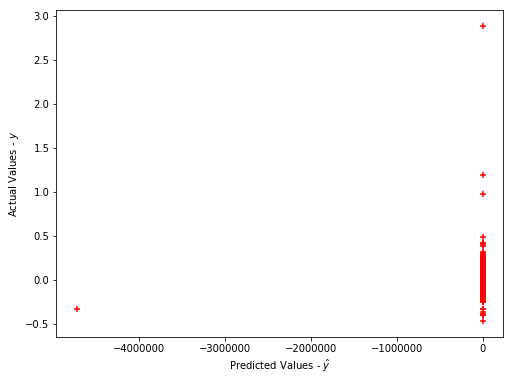

In [37]:
# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y_train, X_train, n_jobs=-1)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

#print "MSE:", mean_squared_error(y, predictions)

In [38]:
df = df2.dropna()
df = df[df['country'] != 'United States']
df = df.drop(['country','countrycode','currency_unit','year','i_cig','i_xm','i_xr','i_outlier','rgdpo growth','rgdpe growth'], 1)
X = df.drop(['xr'], 1)
y = df['xr']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
names = X_train.dtypes.index
print("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
print(rf.score(X_test, y_test))

Features sorted by their score:
[(0.12570000000000001, 'rconna'), (0.089399999999999993, 'cwtfp'), (0.086400000000000005, 'pop'), (0.072300000000000003, 'csh_r'), (0.061800000000000001, 'csh_i'), (0.057599999999999998, 'labsh'), (0.057299999999999997, 'rkna'), (0.050799999999999998, 'delta'), (0.0395, 'hc growth'), (0.038800000000000001, 'rwtfpna'), (0.0309, 'pop growth'), (0.0253, 'rgdpe per capita growth'), (0.024199999999999999, 'pl_m'), (0.022599999999999999, 'hc'), (0.021100000000000001, 'rtfpna'), (0.0207, 'emp'), (0.0189, 'ccon'), (0.016400000000000001, 'ctfp'), (0.015900000000000001, 'csh_c'), (0.015699999999999999, 'rgdpo per capita growth'), (0.014200000000000001, 'pl_i'), (0.012500000000000001, 'rgdpe'), (0.0117, 'csh_g'), (0.010200000000000001, 'ck'), (0.0088999999999999999, 'pl_g'), (0.0076, 'delta xr'), (0.0061999999999999998, 'pl_da'), (0.0054000000000000003, 'csh_m'), (0.0044000000000000003, 'cda'), (0.0041000000000000003, 'GDPo per capita'), (0.0030000000000000001, 'pl

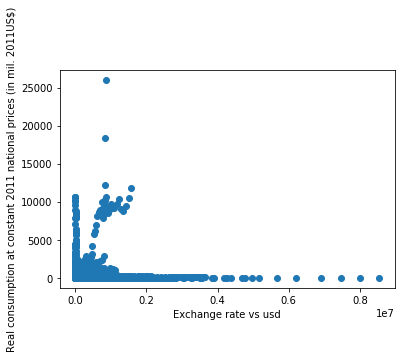

In [39]:
X = df['rconna']
plt.scatter(X, y)
plt.xlabel('Exchange rate vs usd')
plt.ylabel('Real consumption at constant 2011 national prices (in mil. 2011US$)')
plt.show()

In [40]:
df = df2.dropna()
df = df[df['country'] != 'United States']
df = df.drop(['country','countrycode','currency_unit','year','i_cig','i_xm','i_xr','i_outlier','rgdpo growth','rgdpe growth'], 1)
X = df.drop(['xr'], 1)
y = df['xr']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
names = X_train.dtypes.index
print("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
print(rf.score(X_test, y_test))

Features sorted by their score:
[(0.17630000000000001, 'rconna'), (0.070400000000000004, 'cwtfp'), (0.060999999999999999, 'csh_r'), (0.060100000000000001, 'labsh'), (0.058200000000000002, 'rdana'), (0.049500000000000002, 'csh_i'), (0.0402, 'pop'), (0.034200000000000001, 'csh_c'), (0.0339, 'pop growth'), (0.033399999999999999, 'emp'), (0.0315, 'rgdpe per capita growth'), (0.029899999999999999, 'csh_g'), (0.029399999999999999, 'pl_m'), (0.028500000000000001, 'rwtfpna'), (0.026100000000000002, 'pl_k'), (0.024199999999999999, 'rkna'), (0.021999999999999999, 'delta'), (0.021999999999999999, 'cda'), (0.021100000000000001, 'csh_x'), (0.018499999999999999, 'hc growth'), (0.0135, 'rtfpna'), (0.012999999999999999, 'rgdpna'), (0.012200000000000001, 'pl_g'), (0.0118, 'ccon'), (0.0095999999999999992, 'ck'), (0.0071999999999999998, 'rgdpo per capita growth'), (0.0066, 'cgdpe'), (0.0063, 'rgdpo'), (0.0053, 'csh_m'), (0.0051999999999999998, 'GDPo per capita'), (0.0050000000000000001, 'pl_x'), (0.00479

In [45]:
df = df2.dropna()
df = df.drop(['country','countrycode','currency_unit','year','i_cig','i_xm','i_xr','i_outlier','rgdpo growth','rgdpe growth'], 1)
X = df.drop(['rgdpe per capita growth','rgdpo per capita growth','cgdpo','rgdpo','cgdpe','rgdpe','rgdpna'], 1)
y = df['rgdpo']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
names = X_train.dtypes.index
print("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
print(rf.score(X_test, y_test))

Features sorted by their score:
[(0.47720000000000001, 'cda'), (0.2172, 'ccon'), (0.1452, 'ck'), (0.081600000000000006, 'rkna'), (0.073200000000000001, 'rdana'), (0.0011000000000000001, 'rtfpna'), (0.00050000000000000001, 'rwtfpna'), (0.00050000000000000001, 'pop'), (0.00050000000000000001, 'pl_x'), (0.00050000000000000001, 'pl_g'), (0.00050000000000000001, 'pl_con'), (0.00029999999999999997, 'delta'), (0.00020000000000000001, 'pl_k'), (0.00020000000000000001, 'GDPo per capita'), (0.0001, 'rconna'), (0.0001, 'pop growth'), (0.0001, 'pl_m'), (0.0001, 'pl_i'), (0.0001, 'pl_gdpo'), (0.0001, 'labsh'), (0.0001, 'hc'), (0.0001, 'emp'), (0.0001, 'csh_r'), (0.0001, 'csh_m'), (0.0001, 'csh_g'), (0.0001, 'csh_c'), (0.0001, 'GDPe per capita'), (0.0, 'xr'), (0.0, 'pl_da'), (0.0, 'pl_c'), (0.0, 'hc growth'), (0.0, 'delta xr'), (0.0, 'cwtfp'), (0.0, 'ctfp'), (0.0, 'csh_x'), (0.0, 'csh_i')]
0.997823141392


In [53]:
df = df2.dropna()
df = df.drop(['country','countrycode','currency_unit','year','i_cig','i_xm','i_xr','i_outlier','rgdpo growth','rgdpe growth'], 1)
X = df.drop(['rgdpe per capita growth','rgdpo per capita growth','cgdpo','rgdpo','cgdpe','rgdpe','rgdpna','GDPo per capita','GDPe per capita'], 1)
y = df['GDPo per capita']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
names = X_train.dtypes.index
print("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
print(rf.score(X_test, y_test))

Features sorted by their score:
[(0.38100000000000001, 'pl_con'), (0.27100000000000002, 'ctfp'), (0.098100000000000007, 'hc'), (0.091300000000000006, 'csh_c'), (0.031300000000000001, 'pl_g'), (0.019199999999999998, 'pl_m'), (0.011900000000000001, 'pop growth'), (0.0088000000000000005, 'csh_x'), (0.0064999999999999997, 'xr'), (0.0060000000000000001, 'cwtfp'), (0.0055999999999999999, 'csh_g'), (0.0054000000000000003, 'csh_i'), (0.0048999999999999998, 'pl_x'), (0.0047999999999999996, 'labsh'), (0.0047999999999999996, 'ccon'), (0.0044000000000000003, 'rtfpna'), (0.0043, 'rkna'), (0.0041999999999999997, 'cda'), (0.0041000000000000003, 'csh_r'), (0.0033999999999999998, 'hc growth'), (0.0033999999999999998, 'delta'), (0.0033, 'rconna'), (0.0033, 'pl_gdpo'), (0.0028, 'pop'), (0.0025999999999999999, 'ck'), (0.0025000000000000001, 'pl_da'), (0.0023999999999999998, 'rwtfpna'), (0.0019, 'csh_m'), (0.0015, 'pl_k'), (0.0015, 'pl_i'), (0.0014, 'pl_c'), (0.0011000000000000001, 'rdana'), (0.00069999999

In [47]:
df2.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'ck', 'ctfp',
       'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rkna', 'rtfpna', 'rwtfpna',
       'labsh', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo', 'i_cig', 'i_xm',
       'i_xr', 'i_outlier', 'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m',
       'csh_r', 'pl_c', 'pl_i', 'pl_g', 'pl_x', 'pl_m', 'pl_k',
       'GDPe per capita', 'GDPo per capita', 'rgdpe growth', 'rgdpo growth',
       'pop growth', 'hc growth', 'delta xr', 'rgdpe per capita growth',
       'rgdpo per capita growth'],
      dtype='object')